# PyCity Schools Analysis

- Summary of the analysis

    This analysis looked at two data sets focused on analysing the school sizes, budgets, and their students performance. The two datasets were merged and a high level overview and detailed analysis was made of all the schools. The points focused on were:
    1. A summary of the combined values for the entire district.
    2. A similar summary performed for each individual school.
    3. The highest and lowest performing schools based on math and reading grades.
    4. Student performance analysed by grade for each school. 
    5. The total budget per school and the budget per student.
    6. The performance of the students by school type.

- Two conclusions, comparisons
    1. In the top and bottom performing schools, we see that all the school types in the top 5 are Charter, and all the school types for the bottom 5 performing schools are District. The school size for the bottom 5 are also large(2000-5000 students), as opposed to the schools performing well, which tend to be medium-smaller sized schools, where individual students can get more assistance.
    2. We see that the budget for the bottom performing schools are higher, per student, compared to the budget for the top performing schools. We can conclude that if improvements need to be made to students performance, it may not be directly correlated to the school's budget, but rather, the attention given to individual students.
---

In [36]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#filepaths
school_data = '../Starter_Code/PyCitySchools/Resources/schools_complete.csv'
student_data = '../Starter_Code/PyCitySchools/Resources/students_complete.csv'

#reading in data
school_data = pd.read_csv(school_data)
student_data = pd.read_csv(student_data)

#merging all data into one dataframe
school_data_all = pd.merge(student_data, school_data, how = "left", on = ["school_name"])
school_data_all.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [37]:
# Total number of unique schools
school_count = len(school_data)
school_count

15

In [38]:
# Total number of students
student_count = len(student_data)
student_count

39170

In [39]:
# Calculate the total budget
total_budget = sum(school_data['budget'])
total_budget

24649428

In [40]:
# Calculate the average (mean) math score
average_math_score = np.mean(student_data['math_score'])
average_math_score

78.98537145774827

In [41]:
# Calculate the average (mean) reading score
average_reading_score = np.mean(student_data['reading_score'])
average_reading_score

81.87784018381414

In [42]:
# %of students passing math
passing_math_count = student_data[(student_data['math_score'])>=70].count()['student_name']
passing_math_percentage = (passing_math_count/student_count)*100
passing_math_percentage

74.9808526933878

In [43]:
# % of students passing reading
passing_reading_count = student_data[(student_data['reading_score'])>=70].count()['student_name']
passing_reading_percentage = (passing_reading_count/student_count)*100
passing_reading_percentage

85.80546336482001

In [44]:
# % of students passing overall
passing_math_reading_count = student_data[((student_data['math_score'])>=70) & \
                                          ((student_data['reading_score'])>=70)].count()['student_name']
passing_math_reading_percentage = (passing_math_reading_count/student_count)*100
passing_math_reading_percentage

65.17232575950983

In [45]:
# High-level snapshot of the district's key metrics in a DataFrame
# Dict object to store all values:
district_summary = {
    'Total Schools': [school_count],
    'Total Students': [student_count],
    'Total Budget': [total_budget],
    'Average Math Score': [average_math_score],
    'Average Reading Score': [average_reading_score],
    '% Passing Math': [passing_math_percentage],
    '% Passing Reading': [passing_reading_percentage],
    '% Overall Passing': [passing_math_reading_percentage]
}

# convert to dataframe
district_summary = pd.DataFrame(district_summary)

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [46]:
# Select all school types
# Because each school has the same school type, I used the .drop_duplicates func (can also read directly from school_data)
school_types = school_data_all[['school_name', 'type']].drop_duplicates()
school_types

,school_name,type
0,Huang High School,District
2917,Figueroa High School,District
5866,Shelton High School,Charter
7627,Hernandez High School,District
12262,Griffin High School,Charter
13730,Wilson High School,Charter
16013,Cabrera High School,Charter
17871,Bailey High School,District
22847,Holden High School,Charter
23274,Pena High School,Charter


In [47]:
# Calculate the total student count per school
per_school_counts = school_data_all.groupby('school_name')['student_name'].count()
per_school_counts

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: student_name, dtype: int64

In [48]:
# Calculate the total school budget and per capita spending per school
per_school_budget = school_data.groupby('school_name')['budget'].mean()
per_school_capita = per_school_budget/per_school_counts
per_school_capita

school_name
Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [49]:
# Calculate the average test scores per school
per_school_math = school_data_all.groupby('school_name')['math_score'].mean()
per_school_reading = school_data_all.groupby('school_name')['reading_score'].mean()
per_school_reading


school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.725724
Thomas High School       83.848930
Wilson High School       83.989488
Wright High School       83.955000
Name: reading_score, dtype: float64

In [50]:
students_passing_math = school_data_all['math_score']>=70
school_students_passing_math = school_data_all[students_passing_math].groupby('school_name')['math_score'].count()
school_students_passing_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: math_score, dtype: int64

In [51]:
students_passing_reading = school_data_all['reading_score']>=70
school_students_passing_reading = school_data_all[students_passing_reading].groupby('school_name')['reading_score'].count()
school_students_passing_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
Name: reading_score, dtype: int64

In [52]:
students_passing_math_and_reading = school_data_all[
    (school_data_all["reading_score"] >= 70) & (school_data_all["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()
school_students_passing_math_and_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
dtype: int64

In [53]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100
overall_passing_rate

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [68]:
# A summary of all elements calculated above
# Note: because the structure of 'School type' is different, it is merged to the df later on
per_school_summary = {#'School Type': school_types, 
                           'Total Students': per_school_counts, 
                           'Total School Budget': per_school_budget,
                           'Per Student Budget': per_school_capita, 
                           'Average Math Score': per_school_math, 
                           'Average Reading Score': per_school_reading, 
                           '% Passing Math': per_school_passing_math, 
                           '% Passing Reading': per_school_passing_reading, 
                           '% Overall Passing': overall_passing_rate
                        }

#formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# merge 'school_type'
per_school_summary = school_types.merge(pd.DataFrame(per_school_summary), how = 'outer', on = 'school_name')
per_school_summary.rename(columns={'type': 'School Type'}, inplace=True)
per_school_summary.set_index('school_name', inplace=True)
per_school_summary.index.name = None
per_school_summary


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Shelton High School,Charter,1761,"$1,056,600.00",$600.00,83.359455,83.725724,93.867121,95.854628,89.892107
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Highest-Performing Schools (by % Overall Passing)

In [55]:
# <a id='hps1234'></a>
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = pd.DataFrame(per_school_summary.sort_values(ascending=False, by = '% Overall Passing'))
top_schools.set_index(['school_name'], inplace=True)
top_schools.index.name = None
top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [56]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = pd.DataFrame(per_school_summary.sort_values(ascending=True, by = '% Overall Passing'))
bottom_schools.set_index(['school_name'], inplace=True)
bottom_schools.index.name = None
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


In the following plot, we can see that highest budget from the top performing schools is lower than the lowest budget in the bottom performing schools.

The highest budget from the top performing schools is $638.00 and the lowest budget from the bottom performing schools is $637.00


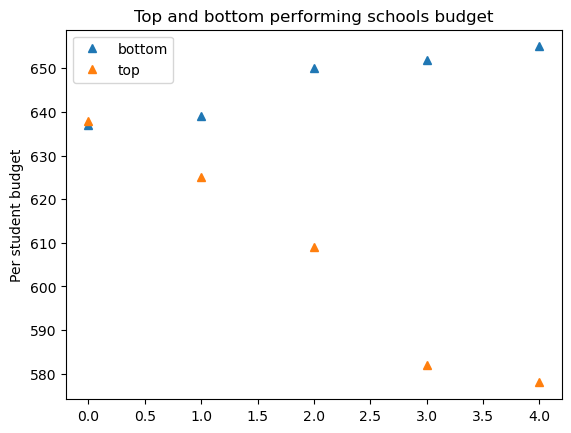

In [57]:
# Not in the assignment, but interesting
bottom = [637, 639, 655, 652, 650]
top = [582, 638, 625, 578, 609]
bottom.sort()
top.sort(reverse = True)
plt.plot(bottom, '^', label = 'bottom')
plt.plot(top, '^', label = 'top')
plt.legend()
plt.ylabel('Per student budget')
plt.title('Top and bottom performing schools budget')
print(f'The highest budget from the top performing schools \
is', top_schools.head(5)['Per Student Budget'].max(), 'and \
the lowest budget from the bottom performing schools is', 
bottom_schools.head(5)['Per Student Budget'].min())

## Math Scores by Grade

In [58]:
#group each grade into their respective variables
ninth_graders = school_data_all[(school_data_all['grade']=='9th')]
tenth_graders = school_data_all[(school_data_all['grade']=='10th')]
eleventh_graders = school_data_all[(school_data_all['grade']=='11th')]
twelfth_graders = school_data_all[(school_data_all['grade']=='12th')]

# Group by `school_name` and take the mean of the `math_score` column for each.
ninth_grade_math_scores = ninth_graders.groupby('school_name')['math_score'].mean()
tenth_grader_math_scores = tenth_graders.groupby('school_name')['math_score'].mean()
eleventh_grader_math_scores = eleventh_graders.groupby('school_name')['math_score'].mean()
twelfth_grader_math_scores = twelfth_graders.groupby('school_name')['math_score'].mean()

#writing into a dict to display
math_scores_by_grade = {
    '9th': ninth_grade_math_scores,
    '10th': tenth_grader_math_scores,
    '11th': eleventh_grader_math_scores,
    '12th': twelfth_grader_math_scores
}
# Convert to dataframe
math_scores_by_grade = pd.DataFrame(math_scores_by_grade)
# Remove index name
math_scores_by_grade.index.name = None
# Display
print('Math scores by grade')
math_scores_by_grade

Math scores by grade


,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

In [59]:
ninth_graders = school_data_all[(school_data_all['grade']=='9th')]
tenth_graders = school_data_all[(school_data_all['grade']=='10th')]
eleventh_graders = school_data_all[(school_data_all['grade']=='11th')]
twelfth_graders = school_data_all[(school_data_all['grade']=='12th')]

# Group by `school_name` and take the mean of the `reading_score` column for each.
ninth_grade_reading_scores = ninth_graders.groupby('school_name')['reading_score'].mean()
tenth_grader_reading_scores = tenth_graders.groupby('school_name')['reading_score'].mean()
eleventh_grader_reading_scores = eleventh_graders.groupby('school_name')['reading_score'].mean()
twelfth_grader_reading_scores = twelfth_graders.groupby('school_name')['reading_score'].mean()

#writing into a dict to display
reading_scores_by_grade = {
    '9th': ninth_grade_reading_scores,
    '10th': tenth_grader_reading_scores,
    '11th': eleventh_grader_reading_scores,
    '12th': twelfth_grader_reading_scores
}
# Convert to Dataframe
reading_scores_by_grade = pd.DataFrame(reading_scores_by_grade)
# Remove index name
reading_scores_by_grade.index.name = None
# Display
print('Reading scores by grade')
reading_scores_by_grade

Reading scores by grade


,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

In [60]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]
per_school_summary.dtypes

school_name               object
School Type               object
Total Students             int64
Total School Budget       object
Per Student Budget        object
Average Math Score       float64
Average Reading Score    float64
% Passing Math           float64
% Passing Reading        float64
% Overall Passing        float64
dtype: object

*Note: 

in per_school_summary, since the 'Per Student Budget' was converted to a string, i.e. ${:,.2f}, I copied the dataframe over before this conversion was made, rather than making a copy using .copy()

In [61]:
# Create a copy of the school summary since it has the "Per Student Budget" 
school_spending_df = {#'School Type': school_types, 
                           'Total Students': per_school_counts, 
                           'Total School Budget': per_school_budget,
                           'Per Student Budget': per_school_capita, 
                           'Average Math Score': per_school_math, 
                           'Average Reading Score': per_school_reading, 
                           '% Passing Math': per_school_passing_math, 
                           '% Passing Reading': per_school_passing_reading, 
                           '% Overall Passing': overall_passing_rate
                        }
school_spending_df = pd.DataFrame(school_spending_df)
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df['Per Student Budget'], spending_bins, labels = labels)

school_spending_df


,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
school_name,,,,,,,,,
Bailey High School,4976,3124928.0,628.0,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,1858,1081356.0,582.0,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,2949,1884411.0,639.0,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,2739,1763916.0,644.0,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,1468,917500.0,625.0,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,4635,3022020.0,652.0,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,427,248087.0,581.0,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,2917,1910635.0,655.0,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,4761,3094650.0,650.0,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680


## Scores by School Size

In [62]:
# Establish the bins 
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [63]:
# Perform the bin calculation
per_school_summary['School Size'] = pd.cut(per_school_summary['Total Students'], size_bins, labels = labels)
per_school_summary.set_index('school_name')
# Sorted values referred to in analysis
# per_school_summary.sort_values(ascending = False, by = '% Overall Passing')


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
school_name,,,,,,,,,,
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Shelton High School,Charter,1761,"$1,056,600.00",$600.00,83.359455,83.725724,93.867121,95.854628,89.892107,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)


In [60]:
# Calculate averages for the desired columns. 
size_math_scores = pd.DataFrame(per_school_summary).groupby("School Size")["Average Math Score"].mean()
size_reading_scores = pd.DataFrame(per_school_summary).groupby("School Size")["Average Reading Score"].mean()
size_passing_math = pd.DataFrame(per_school_summary).groupby("School Size")["% Passing Math"].mean()
size_passing_reading = pd.DataFrame(per_school_summary).groupby("School Size")["% Passing Reading"].mean()
size_overall_passing = pd.DataFrame(per_school_summary).groupby("School Size")["% Overall Passing"].mean()

/var/folders/_p/y56kr6vs1fz7ycsbxhyqwwwc0000gn/T/ipykernel_5816/2273535442.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_math_scores = pd.DataFrame(per_school_summary).groupby("School Size")["Average Math Score"].mean()
/var/folders/_p/y56kr6vs1fz7ycsbxhyqwwwc0000gn/T/ipykernel_5816/2273535442.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_reading_scores = pd.DataFrame(per_school_summary).groupby("School Size")["Average Reading Score"].mean()
/var/folders/_p/y56kr6vs1fz7ycsbxhyqwwwc0000gn/T/ipykernel_5816/2273535442.py:4: FutureWarning: The default of observed=False is deprecated and will

In [61]:
size_summary = {
    'Average Math Score': size_math_scores,
    'Average Reading Score': size_reading_scores,
    '% Passing Math': size_passing_math,
    '% Passing Reading': size_passing_reading,
    '% Overall Passing': size_overall_passing
}
pd.DataFrame(size_summary)

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [62]:
# Group the per_school_summary DataFrame by "type" and average the results.
average_math_score_by_type = pd.DataFrame(per_school_summary).groupby(["type"])["Average Math Score"].mean()
average_reading_score_by_type = pd.DataFrame(per_school_summary).groupby(["type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = pd.DataFrame(per_school_summary).groupby(["type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = pd.DataFrame(per_school_summary).groupby(["type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = pd.DataFrame(per_school_summary).groupby(["type"])["% Overall Passing"].mean()

In [63]:
type_summary = {
    'Average Math Score': average_math_score_by_type,
    'Average Reading Score': average_reading_score_by_type,
    '% Passing Math': average_percent_passing_math_by_type,
    '% Passing Reading': average_percent_passing_reading_by_type,
    '% Overall Passing': average_percent_overall_passing_by_type
}
pd.DataFrame(type_summary)

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208
